In [1]:
%matplotlib inline
from preamble import *

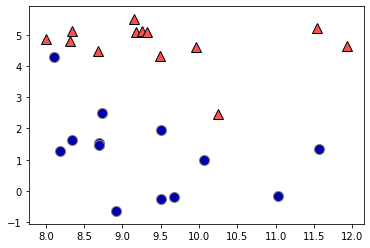

In [2]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [3]:
X[:,0]

array([ 9.963, 11.033, 11.542,  8.693,  8.106,  8.31 , 11.93 ,  9.673,
        8.348,  8.675,  9.177, 10.24 ,  8.689,  8.922,  9.491,  9.257,
        7.998,  8.184,  8.734,  9.323, 10.064,  9.5  ,  8.345,  9.502,
        9.151, 11.564])

In [4]:
np.shape(X)

(26, 2)

In [5]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

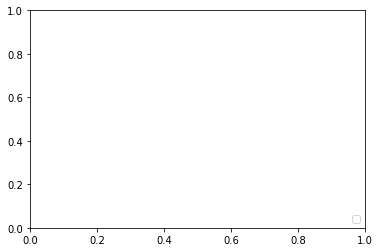

In [6]:
plt.legend(["Class 0", "Class 1"], loc=4)

Text(0, 0.5, 'Second feature')

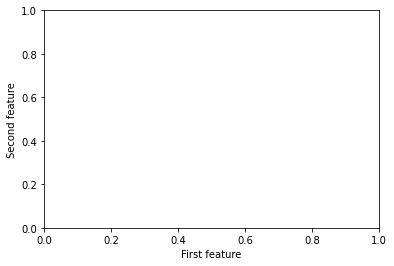

In [7]:
plt.xlabel('First feature')
plt.ylabel('Second feature')

X.shape: (26, 2)


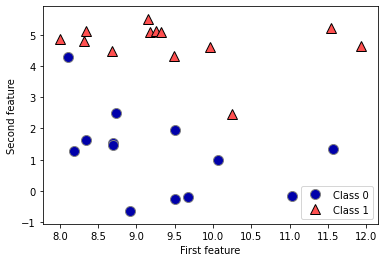

In [8]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

Text(0, 0.5, 'target')

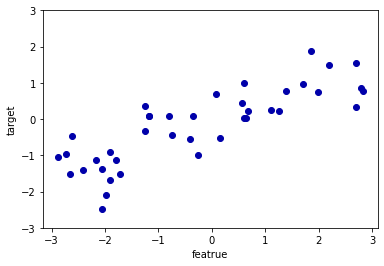

In [9]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('featrue')
plt.ylabel('target')

In [10]:
# sklearnの乳がんのdatasetから
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
cancer.data.shape

(569, 30)

In [12]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [13]:
np.bincount(cancer.target)

array([212, 357])

In [14]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [15]:
from  sklearn.datasets import load_boston

In [16]:
boston = load_boston()

/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [17]:
boston.data.shape

(506, 13)

In [18]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [19]:
import math
math.factorial(13+2-1) / (math.factorial(12) * (2))

91.0

# k-最近傍法(k-nn)
訓練データセットから一番近い点つまり「最近傍点」を見つける
近傍点を複数持つ時は属するクラスの数が一番多いものを採用
多クラスでも可能！

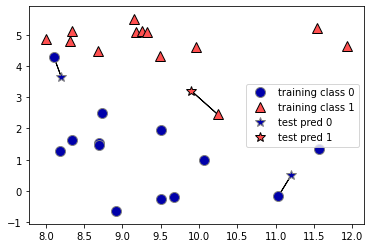

In [20]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

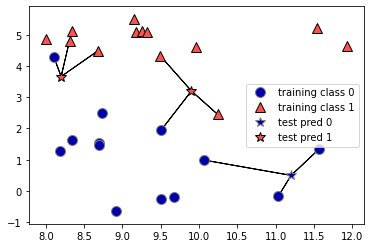

In [21]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [22]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [25]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [27]:
clf.score(X_test,y_test)

0.8571428571428571

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


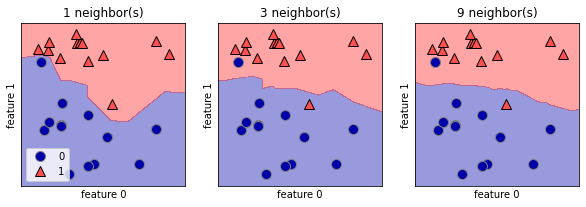

In [28]:
fig,axes = plt.subplots(1,3,figsize=(10,3))
print(axes)
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [29]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train, y_test = train_test_split(
cancer.data,cancer.target,stratify=cancer.target,random_state=66)

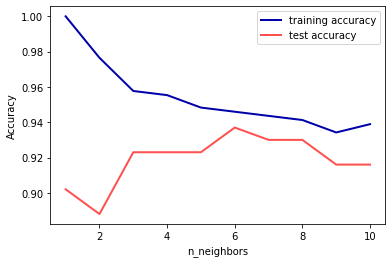

In [30]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


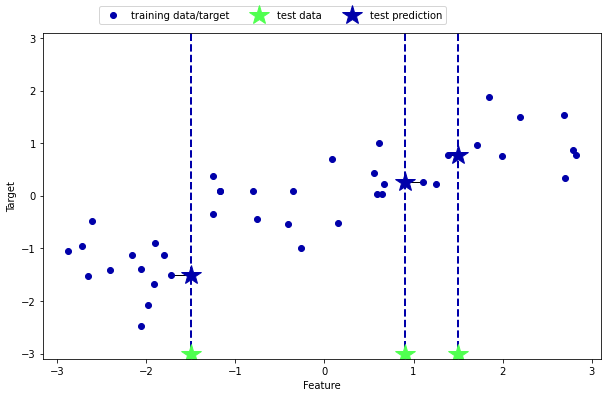

In [31]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

# 回帰モデルでk-nnを用いる
knnのメリット
1. 理解しやすい
2. モデルの構築が高速
3. 近傍点は3 ~ 5個で十分な場合が多い
knnのデメリット
1. 訓練セットが大きくなると予測が遅くなる
2. 多数の特徴量（数100程度）ではうまく動かない

### 結論
処理速度が遅く、多数の特徴量が使えないのであまり用いられない

In [32]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=3)

In [33]:
reg.score(X_test,y_test)

0.8344172446249605

In [34]:
reg.predict(X_test)

array([-0.054,  0.357,  1.137, -1.894, -1.139, -1.631,  0.357,  0.912,
       -0.447, -1.139])

# 線形モデル
特徴量が一つの場合
y = w[0] * x[0] + b
特徴量が多くの場合、
wにはそれぞれの特徴量の軸に対する傾きが入る
予測は入力特徴量の重み付き和ともいう。
モデルを作る手法にはyとの平均二乗誤差が最小となるような通常最小二乗法
sklearnではlinearRegression
=> データ数が多いと、過剰適合する可能性がある。

### リッジ回帰
重みwを小さくして最適化する。
これは正則化といい、特に L2正則化と呼ばれる。(ユークリッド距離に対して、ペナルティーを与える)
Ridgeで実装されている
testの精度が高くなる
正則化はαで調整できる。
αを大きくすると、wは小さくなる
*データ数が大きくなれば、正則化にかかわらず精度は高くなる。

### Lasso
リッジ回帰と同様に重みを調整する。
L1正則化と呼ばる(係数の絶対値の和にペナルティを与える)
=> 0となって無視される特徴現れる。

特徴量が多すぎる時はLassoを使う。
LassoとRidgeを組み合わせたElasticNetも存在する





w[0]: 0.393906  b: -0.031804


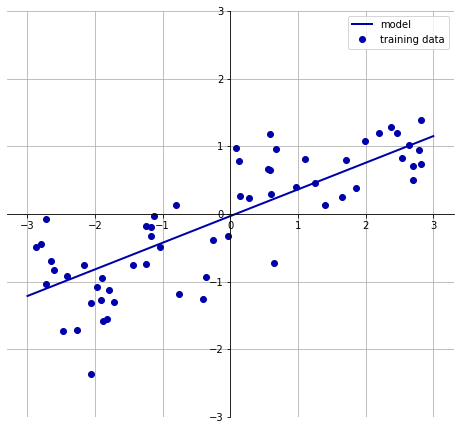

In [35]:
mglearn.plots.plot_linear_regression_wave()

In [36]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train,y_train)

In [37]:
lr.coef_

array([0.394])

In [38]:
lr.intercept_

-0.031804343026759746

In [39]:
lr.score(X_train,y_train
    )

0.6700890315075756

In [40]:
lr.score(X_train,y_train)

0.6700890315075756

In [41]:
lr.score(X_test,y_test)

0.65933685968637

In [42]:
X,y = mglearn.datasets.load_extended_boston()

/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)

In [45]:
lr.score(X_train,y_train)

0.952051960903273

In [46]:
X_train

array([[0.002, 0.22 , 0.198, ..., 0.961, 0.453, 0.213],
       [0.001, 0.25 , 0.171, ..., 1.   , 0.207, 0.043],
       [0.001, 0.4  , 0.218, ..., 0.962, 0.117, 0.014],
       ...,
       [0.002, 0.   , 0.35 , ..., 0.988, 0.235, 0.056],
       [0.003, 0.   , 0.236, ..., 0.979, 0.466, 0.222],
       [0.001, 0.   , 0.132, ..., 1.   , 0.358, 0.128]])

In [47]:
import numpy
numpy.shape(X_train)

(379, 104)

In [48]:
lr.score(X_test,y_test)

0.6074721959666022

In [49]:
from sklearn.linear_model import Ridge

In [50]:
ridge = Ridge().fit(X_train,y_train)

In [51]:
ridge.score(X_train,y_train)

0.885796658517094

In [52]:
ridge.score(X_test,y_test)

0.7527683481744757

In [53]:
ridge10 =  Ridge(alpha=10).fit(X_train,y_train)

In [54]:
ridge10.score(X_train,y_train)

0.7882787115369615

In [55]:
ridge10.score(X_test,y_test)

0.6359411489177311

/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

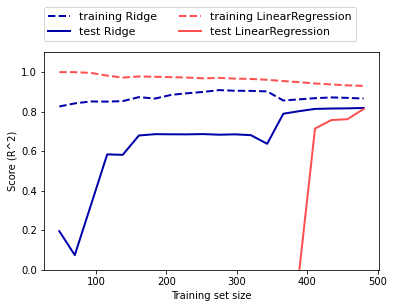

In [56]:
mglearn.plots.plot_ridge_n_samples()

In [57]:
from sklearn.linear_model import Lasso

In [58]:
lasso = Lasso().fit(X_train,y_train)

In [59]:
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))
print(np.sum(lasso.coef_ != 0))

0.29323768991114607
0.20937503255272294
4


In [60]:
lasso

Lasso()

In [61]:
lasso.coef_

array([-0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   ,
       -0.   , -0.   , -0.   ,  0.   , -5.353, -0.   ,  0.   , -0.   ,
        0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.   , -0.   ,
       -0.   , -0.   ,  0.   , -0.   , -0.   ,  0.   , -0.   , -1.051,
       -3.31 , -0.   , -0.   ,  0.   , -0.   , -0.   , -0.   ,  0.   ,
       -0.   , -0.414, -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   ,  0.   , -0.   , -0.   ])

In [62]:
lasso.coef_ == 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

# 線形モデルでクラス分類を行う
決定境界が入力の線形関数を求める。
- ロジスティック回帰(LogisticRegression)
- サポートベクタマシン(LinearSVC)
正則化はcを用いる
このcとかalphaはcouseraでいうところの、
コスト関数の最後に足してたラムダのことっぽいですね！
cはラムダの逆数をかけたものでしたね
*回帰とは違いcが小さいと正則化が強くなる。

### ナイーブベイズクラス分類器
線形モデルに比べてより高速だが、性能が劣る
- GaussianNB
大規模データに使う
- BernoulliNB
2値データに使う
- MultinomialNB
特徴量のカウント


/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


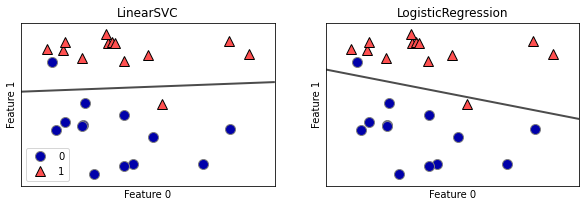

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [64]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, stratify=cancer.target,random_state=42)


In [65]:
logreg = LogisticRegression(solver='liblinear').fit(X_train,y_train)

In [66]:
logreg.score(X_train, y_train)

0.9530516431924883

In [67]:
logreg.score(X_test, y_test)

0.958041958041958

In [68]:
logreg100 = LogisticRegression(C=100,solver='liblinear').fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.967
Test set score: 0.965


In [69]:
logreg100 = LogisticRegression(C=0.01,solver='liblinear').fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


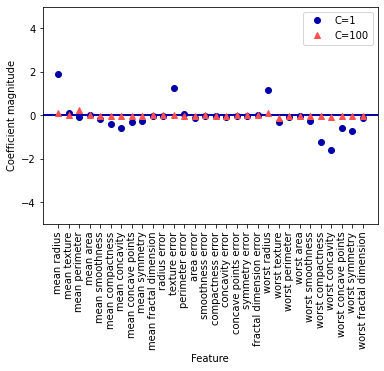

In [70]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
# plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92


/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


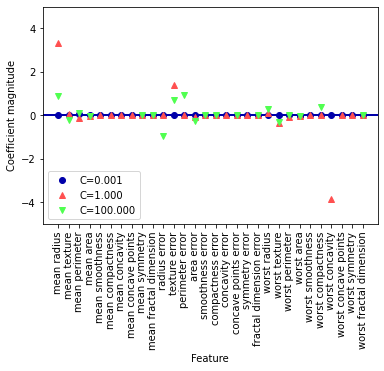

In [71]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

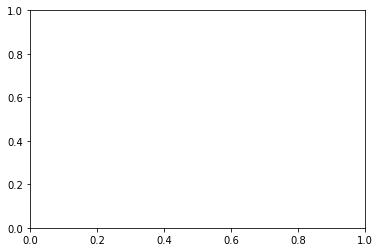

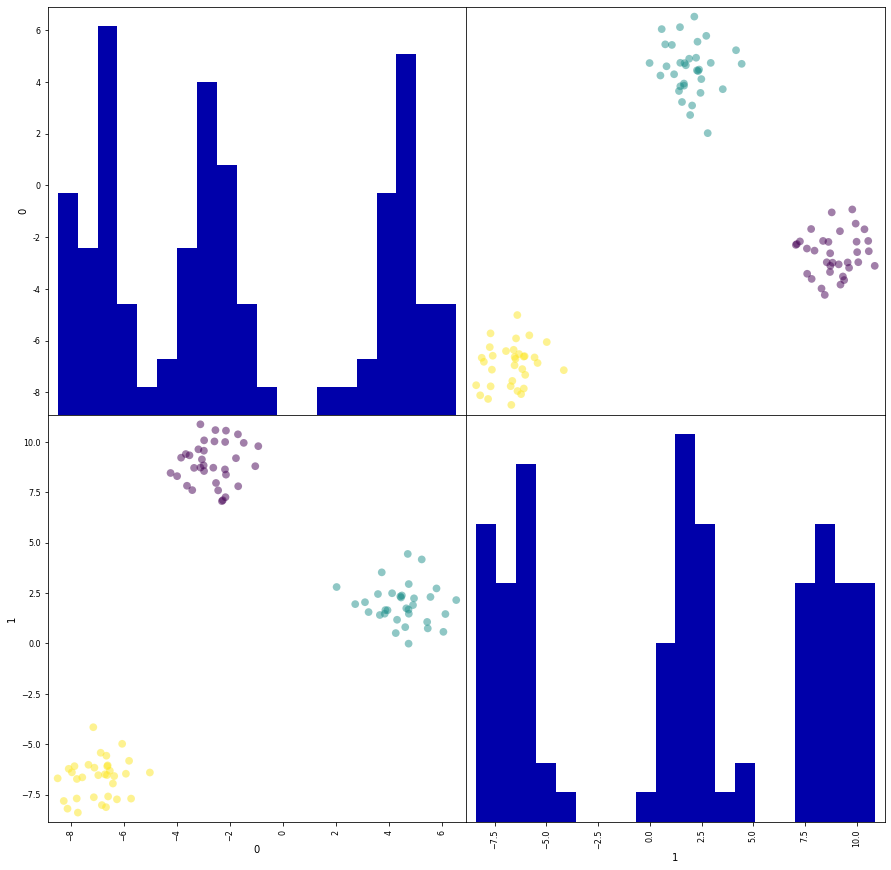

In [72]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
fig, ax = plt.subplots()

X,y = make_blobs(random_state=42)

dataframe = pd.DataFrame(X)
grr = scatter_matrix(dataframe, c=y, figsize=(15, 15),
                         marker='o', hist_kwds ={'bins': 20}, s = 60)





In [73]:
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


In [74]:
print(np.linspace(-15,15))

[-15.    -14.388 -13.776 -13.163 -12.551 -11.939 -11.327 -10.714 -10.102
  -9.49   -8.878  -8.265  -7.653  -7.041  -6.429  -5.816  -5.204  -4.592
  -3.98   -3.367  -2.755  -2.143  -1.531  -0.918  -0.306   0.306   0.918
   1.531   2.143   2.755   3.367   3.98    4.592   5.204   5.816   6.429
   7.041   7.653   8.265   8.878   9.49   10.102  10.714  11.327  11.939
  12.551  13.163  13.776  14.388  15.   ]


In [75]:
np.shape(np.linspace(-15,15))

(50,)

In [77]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [78]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n", counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [79]:
y==label

array([False,  True, False,  True])

## 決定木
クラス分類(DecisionTreeClassifier)と回帰タスク(DecisionTreeRefressor)に使える
Yes,Noで答えを絞っていく「質問ゲーム」のような木構造がモデルになる。
例）たべものか？、甘いか？などで答えを絞る

over fitを防ぐ方法
- 事前枝刈り
木の生成を早めに止める
    1. 深さを決めておく
    2. 葉の最大値を制限する
- 事後枝刈り
木を構築してから情報を削る

### メリット
可視化が容易にできる
### デメリット
訓練データにない領域は答えを返せない
過剰適合しやすい=>
アサンブル法に使われる
*機械学習アルゴリズムを組み合わせる
- ランダムフォレスト
少しずつ異なる決定木をたくさん集める
=> 決定木の過剰適合の平均を取れば良い
- 勾配bースティング回帰木
一つ前の決定技の誤りを次の決定木が修正するように、決定木を順番に作っていく
より正確になるが、モデルの構築に時間がかかる


In [80]:

np.shape(cancer.data)


(569, 30)

In [81]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [82]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)

In [83]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [84]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [85]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

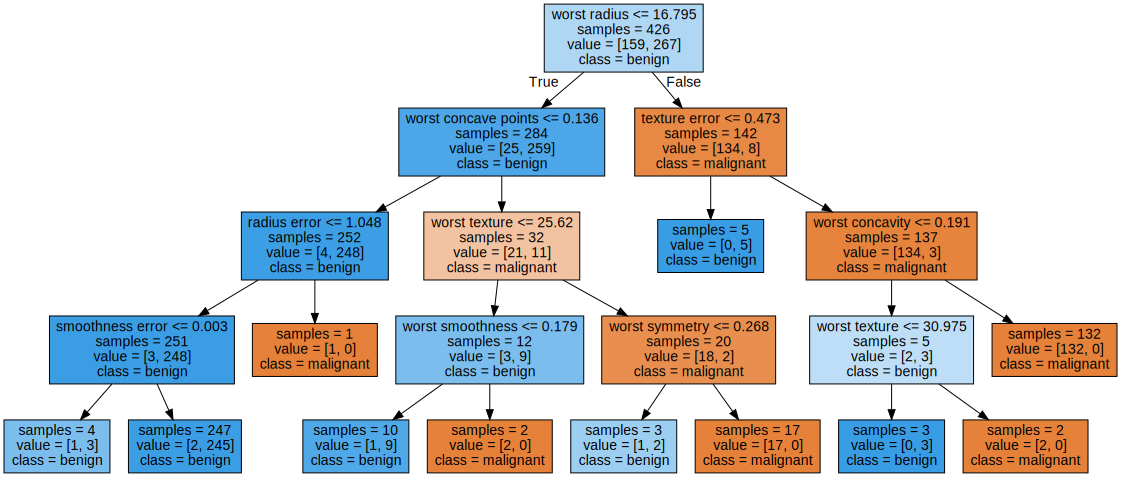

In [86]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

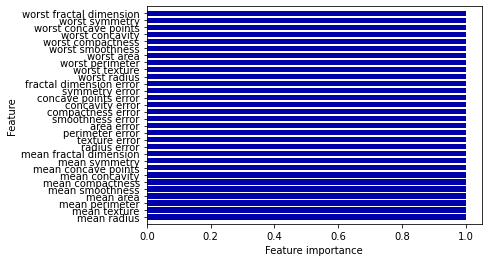

In [89]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


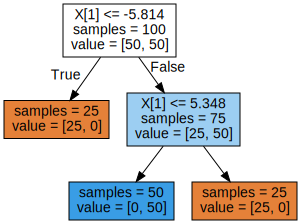

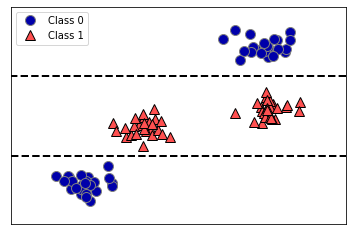

In [90]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

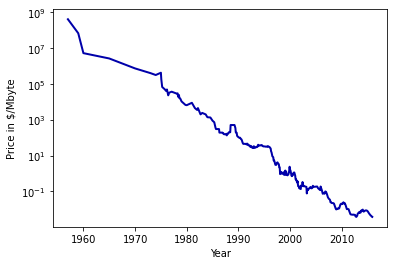

In [91]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [93]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
# X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

<ipython-input-93-c83859490610>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]


## カーネル法を用いたサポートベクタマシン
より複雑なモデルを可能にするために、線形サポートベクタマシンを拡張したもの。

In [140]:
from numpy import shape
X,y = make_blobs(centers=4,random_state=8)
y = y%2
X= pd.DataFrame(X)
y = pd.DataFrame(y,columns=[3])
dataframe = pd.concat([X,y],axis=1)
dataframe.head()

,0,1,3
0,-1.72,-1.48,1
1,-3.66,-9.55,0
2,7.08,1.00,1
3,-1.37,-0.31,1
4,-2.67,-3.13,1


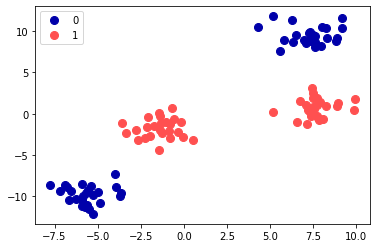

/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


TypeError: float() argument must be a string or a number, not 'LinearSVC'

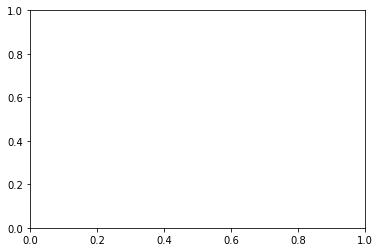

In [164]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
df = dataframe.rename(columns={0:'a',1:'b',3:'c'})
# df.head()
# df.plot.scatter(x="a",y="b",c=y)


fig, ax = plt.subplots()
for name, group in df.groupby('c'):
    ax.plot(group.a, group.b, marker='o', linestyle='', ms=8, label=name)
ax.legend()
plt.show()
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)
plt.plot(linear_svm)

In [160]:
df.a

0    -1.72
1    -3.66
2     7.08
3    -1.37
4    -2.67
      ... 
95    7.49
96    7.74
97    0.54
98    7.81
99    7.54
Name: a, Length: 100, dtype: float64

In [150]:
linear_svm.score(X,y)

0.67

In [151]:
linear_svm

LinearSVC()

In [152]:
linear_svm.cof_

AttributeError: 'LinearSVC' object has no attribute 'cof_'

In [154]:
linear_svm.coef_

array([[ 0.122, -0.089]])

In [156]:
linear_svm.intercept_

array([-0.28])

In [169]:
plt.show()
y

,3
0,1
1,0
2,1
3,1
4,1
...,...
95,1
96,1
97,1
98,1


KeyError: (slice(None, None, None), 0)

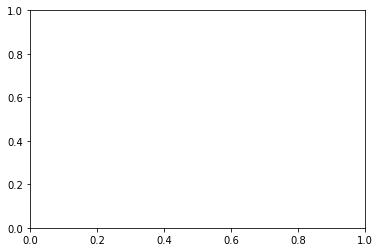

In [171]:
import mglearn
mglearn.plots.plot_2d_separator(linear_svm, X)
# mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

<ipython-input-178-10a703f531ca>:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure,elev=-152,azim=-26)


Text(0.5, 0, 'feature2')

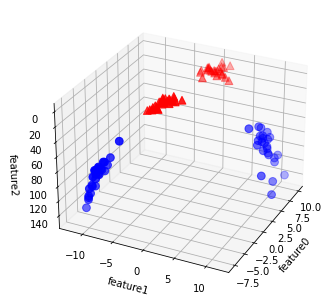

In [178]:
import numpy as np
X,y = make_blobs(centers=4,random_state=8)
y = y%2
X_new = np.hstack([X,X[:,1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D,axes3d
figure = plt.figure()
ax = Axes3D(figure,elev=-152,azim=-26)
mask = y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c="b",cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature2")

/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
<ipython-input-193-0ca49356388c>:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure,elev=-152,azim=-26)


Text(0.5, 0, 'feature1 ** 2')

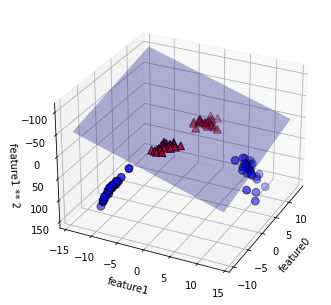

In [193]:
linear_svm_3d = LinearSVC().fit(X_new,y)
coef,intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure,elev=-152,azim=-26)
xx = np.linspace(X_new[:,0].min() -2,X_new[:,1].max()+2,50)
yy = np.linspace(X_new[:,1].min() -2,X_new[:,1].max()+2,50)

XX,YY = np.meshgrid(xx,yy)
shape(XX)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")


In [ ]:
ZZ = YY ** 2
dec = linear_svm_